# Titanic Survival Prediction - Exploratory Data Analysis
# ================================================================

# ## 📋 Objective.
# Perform a full exploratory analysis of the Titanic dataset to:
# - Understand the structure and quality of the data.
# - Identify survival patterns
# - Detect missing values and outliers
# - Generate insights for storytelling

In [3]:
# ## 1. Import of Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

In [5]:
import os
import sys

path = os.path.abspath("")
project_path = os.path.abspath(os.path.join(path, ".."))
sys.path.append(os.path.join(project_path, ""))

from src.utils.helpers import save_current_plot

# 1. Configuration

In [6]:
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# Configuration of displays
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

print("✅ Properly imported libraries")

✅ Properly imported libraries


## 2. Loading and First Data Inspection

In [7]:
# Load the dataset
df = pd.read_csv("../data/raw/titanic.csv")

print("🚢 TITANIC DATASET - FIRST INSPECTION")
print("=" * 50)
print(f"📊 Dataset dimensions: {df.shape}")
print(f"👥 Total passengers: {len(df)}")
print(f"📈 Total features: {len(df.columns)}")

🚢 TITANIC DATASET - FIRST INSPECTION
📊 Dataset dimensions: (891, 12)
👥 Total passengers: 891
📈 Total features: 12


## 3. General Dataset Information

In [8]:
print("\n📋 GENERAL INFORMATION")
print("=" * 30)
print(df.info())

print("\n📊 DESCRIPTIVE STATISTICS")
print("=" * 30)
print(df.describe())

print("\n🔍 FIRST 5 ROWS")
print("=" * 20)
print(df.head())


📋 GENERAL INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

📊 DESCRIPTIVE STATISTICS
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.69

## 4. Missing Value Analysis


❌ MISSING VALUE ANALYSIS
         Column  Missing Values  Percentage (%)
10        Cabin             687       77.104377
5           Age             177       19.865320
11     Embarked               2        0.224467
0   PassengerId               0        0.000000
3          Name               0        0.000000
2        Pclass               0        0.000000
1      Survived               0        0.000000
4           Sex               0        0.000000
7         Parch               0        0.000000
6         SibSp               0        0.000000
9          Fare               0        0.000000
8        Ticket               0        0.000000
✅ Graph saved: ../results/figures/eda_plots\4-Missing Values.png


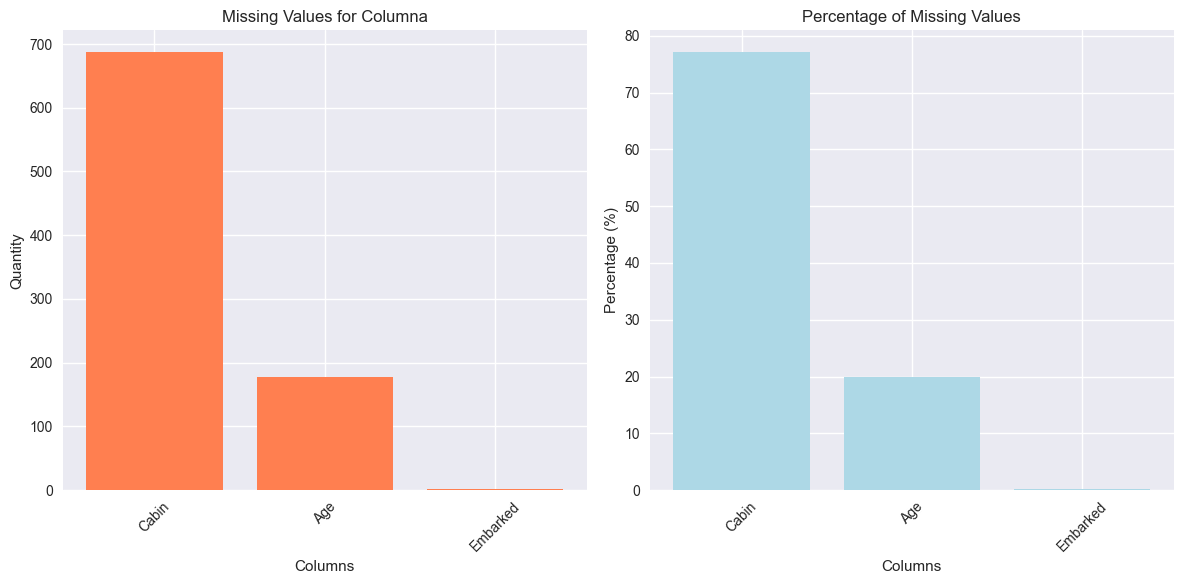

In [9]:
print("\n❌ MISSING VALUE ANALYSIS")
print("=" * 35)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame(
    {
        "Column": missing_data.index,
        "Missing Values": missing_data.values,
        "Percentage (%)": missing_percent.values,
    }
).sort_values("Missing Values", ascending=False)

print(missing_df)

# Display of missing values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
missing_df_filtered = missing_df[missing_df["Missing Values"] > 0]
plt.bar(
    missing_df_filtered["Column"],
    missing_df_filtered["Missing Values"],
    color="coral",
)
plt.title("Missing Values for Columna")
plt.xlabel("Columns")
plt.ylabel("Quantity")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(
    missing_df_filtered["Column"],
    missing_df_filtered["Percentage (%)"],
    color="lightblue",
)
plt.title("Percentage of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)

plt.tight_layout()
save_current_plot("4-Missing Values", "../results/figures/eda_plots")
plt.show()

## 5. Analysis of the Target Variable (Survived)


🎯 SURVIVAL ANALYSIS
👥 Total passengers: 891
💀 Deceased: 549 (61.6%)
✅ Survivors: 342 (38.4%)
📊 Survival rate: 0.384 (38.4%)
✅ Graph saved: ../results/figures/eda_plots\5-Target Variable.png


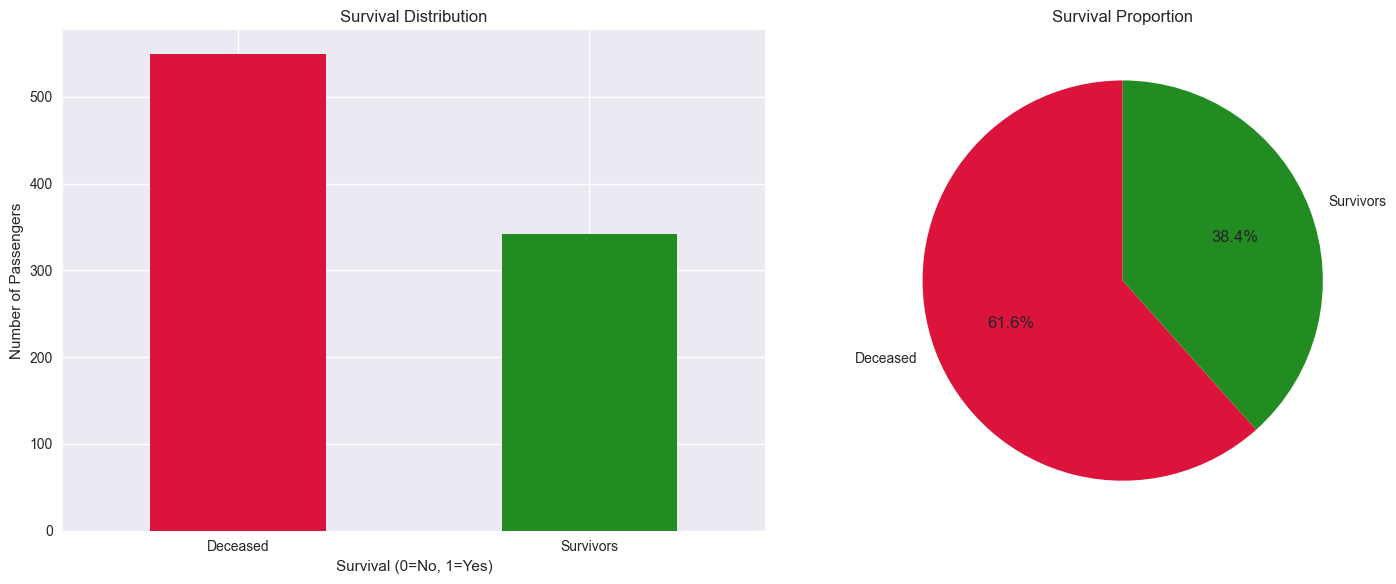

In [10]:
print("\n🎯 SURVIVAL ANALYSIS")
print("=" * 30)

survival_counts = df["Survived"].value_counts()
survival_rate = df["Survived"].mean()

print(f"👥 Total passengers: {len(df)}")
print(f"💀 Deceased: {survival_counts[0]} ({survival_counts[0]/len(df)*100:.1f}%)")
print(f"✅ Survivors: {survival_counts[1]} ({survival_counts[1]/len(df)*100:.1f}%)")
print(f"📊 Survival rate: {survival_rate:.3f} ({survival_rate*100:.1f}%)")

# Survival visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
survival_counts.plot(kind="bar", ax=axes[0], color=["crimson", "forestgreen"])
axes[0].set_title("Survival Distribution")
axes[0].set_xlabel("Survival (0=No, 1=Yes)")
axes[0].set_ylabel("Number of Passengers")
axes[0].set_xticklabels(["Deceased", "Survivors"], rotation=0)

# Pie chart
axes[1].pie(
    survival_counts.values,
    labels=["Deceased", "Survivors"],
    colors=["crimson", "forestgreen"],
    autopct="%1.1f%%",
    startangle=90,
)
axes[1].set_title("Survival Proportion")

plt.tight_layout()
save_current_plot("5-Target Variable", "../results/figures/eda_plots")
plt.show()

## 6. Analysis by Demographic Characteristics

### 6.1 Survival by Gender


👫 SURVIVAL BY GENDER
Contingency table:
Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891

Percentages by gender:
Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9
✅ Graph saved: ../results/figures/eda_plots\6_1-Demographic Characteristics.png


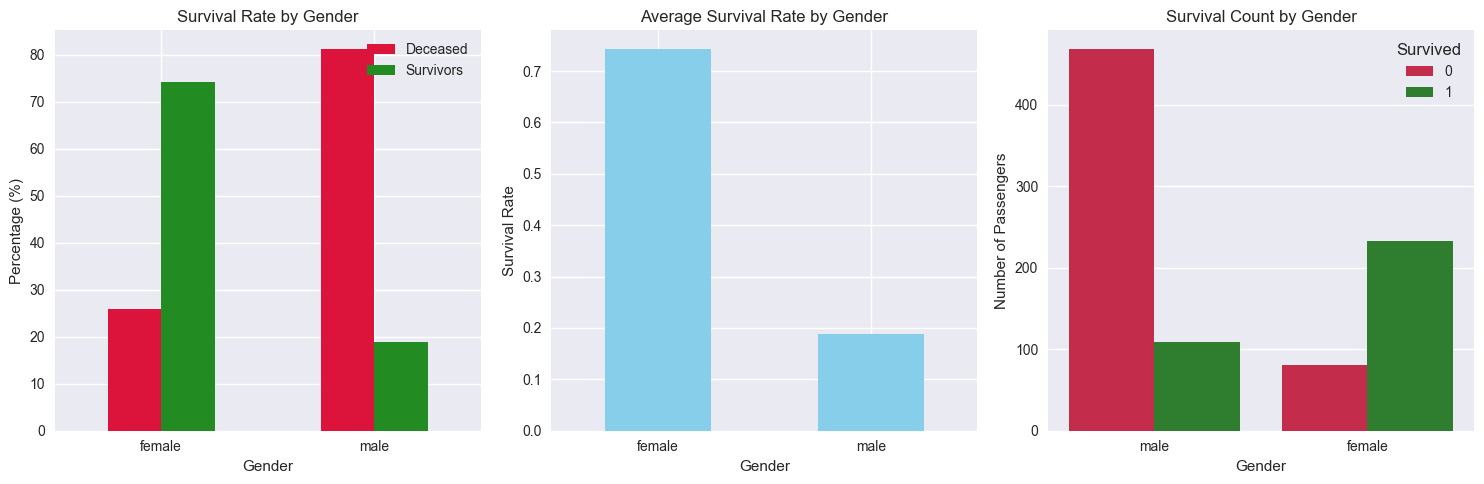

In [11]:
print("\n👫 SURVIVAL BY GENDER")
print("=" * 25)

gender_survival = pd.crosstab(df["Sex"], df["Survived"], margins=True)
gender_survival_pct = pd.crosstab(df["Sex"], df["Survived"], normalize="index") * 100

print("Contingency table:")
print(gender_survival)
print("\nPercentages by gender:")
print(gender_survival_pct.round(1))

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
gender_survival_pct.plot(kind="bar", ax=plt.gca(), color=["crimson", "forestgreen"])
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.legend(["Deceased", "Survivors"])
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
df.groupby("Sex")["Survived"].mean().plot(kind="bar", color="skyblue")
plt.title("Average Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
sns.countplot(data=df, x="Sex", hue="Survived", palette=["crimson", "forestgreen"])
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")

plt.tight_layout()
save_current_plot("6_1-Demographic Characteristics", "../results/figures/eda_plots")
plt.show()

### 6.2 Survival by Class


🎫 SURVIVAL BY CLASS
Contingency table:
Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

Percentages by class:
Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2
✅ Graph saved: ../results/figures/eda_plots\6_2-Survival by Class.png


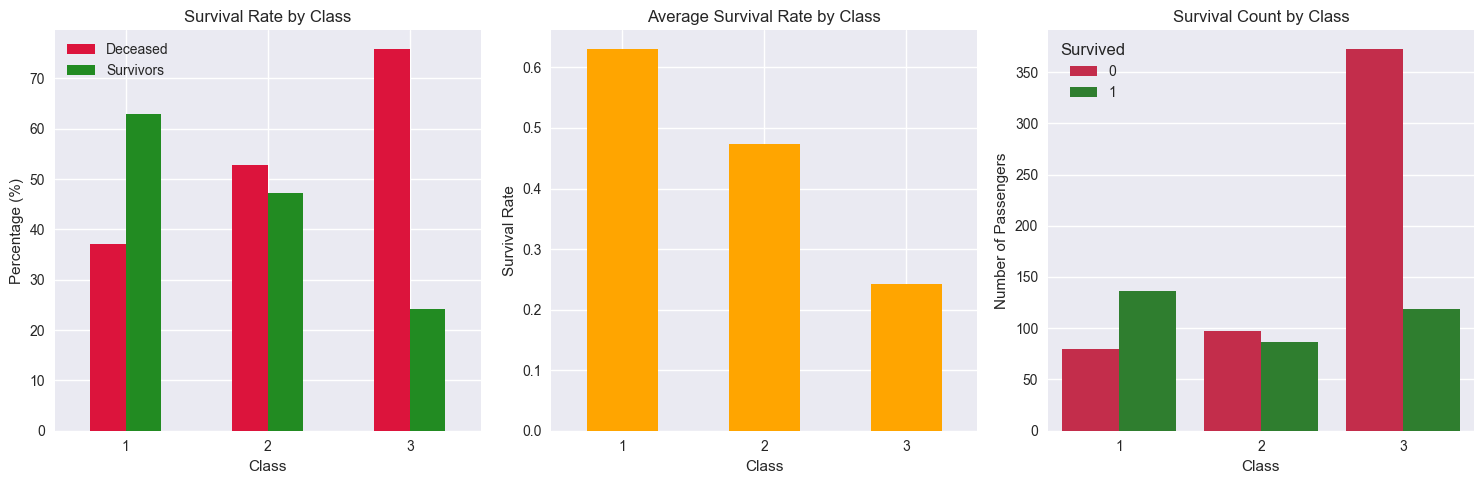

In [12]:
print("\n🎫 SURVIVAL BY CLASS")
print("=" * 25)

class_survival = pd.crosstab(df["Pclass"], df["Survived"], margins=True)
class_survival_pct = pd.crosstab(df["Pclass"], df["Survived"], normalize="index") * 100

print("Contingency table:")
print(class_survival)
print("\nPercentages by class:")
print(class_survival_pct.round(1))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
class_survival_pct.plot(kind="bar", ax=plt.gca(), color=["crimson", "forestgreen"])
plt.title("Survival Rate by Class")
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
plt.legend(["Deceased", "Survivors"])
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
df.groupby("Pclass")["Survived"].mean().plot(kind="bar", color="orange")
plt.title("Average Survival Rate by Class")
plt.xlabel("Class")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
sns.countplot(data=df, x="Pclass", hue="Survived", palette=["crimson", "forestgreen"])
plt.title("Survival Count by Class")
plt.xlabel("Class")
plt.ylabel("Number of Passengers")

plt.tight_layout()
save_current_plot("6_2-Survival by Class", "../results/figures/eda_plots")
plt.show()

### 6.3 Port of Embarkation Survival


⚓ SURVIVAL BY EMBARKATION PORT
Contingency table:
Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889

Percentages by port:
Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.3  33.7
✅ Graph saved: ../results/figures/eda_plots\6_3-Embarkation Port.png


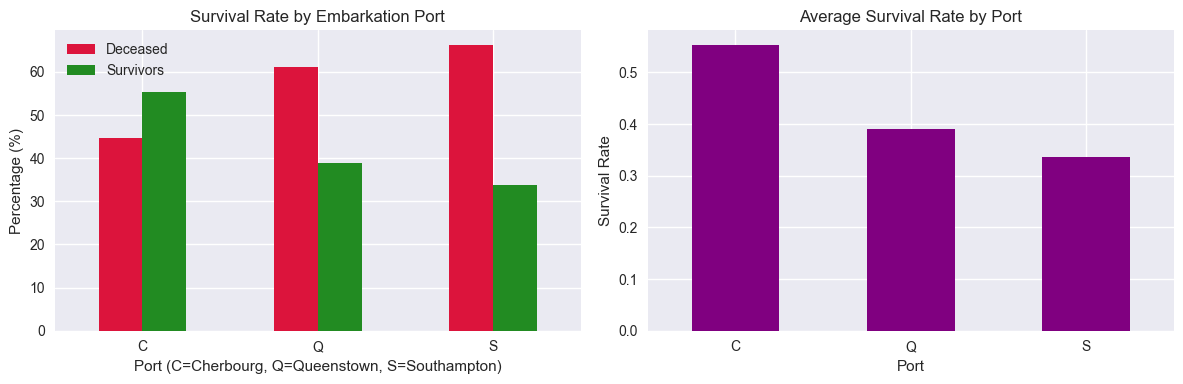

In [13]:
print("\n⚓ SURVIVAL BY EMBARKATION PORT")
print("=" * 35)

# Remove null values for this analysis
df_embarked_clean = df.dropna(subset=["Embarked"])

embarked_survival = pd.crosstab(
    df_embarked_clean["Embarked"], df_embarked_clean["Survived"], margins=True
)
embarked_survival_pct = (
    pd.crosstab(
        df_embarked_clean["Embarked"], df_embarked_clean["Survived"], normalize="index"
    )
    * 100
)

print("Contingency table:")
print(embarked_survival)
print("\nPercentages by port:")
print(embarked_survival_pct.round(1))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
embarked_survival_pct.plot(kind="bar", ax=plt.gca(), color=["crimson", "forestgreen"])
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Port (C=Cherbourg, Q=Queenstown, S=Southampton)")
plt.ylabel("Percentage (%)")
plt.legend(["Deceased", "Survivors"])
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df_embarked_clean.groupby("Embarked")["Survived"].mean().plot(
    kind="bar", color="purple"
)
plt.title("Average Survival Rate by Port")
plt.xlabel("Port")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)

plt.tight_layout()
save_current_plot("6_3-Embarkation Port", "../results/figures/eda_plots")
plt.show()

## 7. Analysis of Numerical Variables

### 7.1 Age Distribution


👶👴 AGE ANALYSIS
Average age: 29.7 years
Median age: 28.0 years
Minimum age: 0.4 years
Maximum age: 80.0 years
Standard deviation: 14.5 years
✅ Graph saved: ../results/figures/eda_plots\7_1-Age Distribution.png


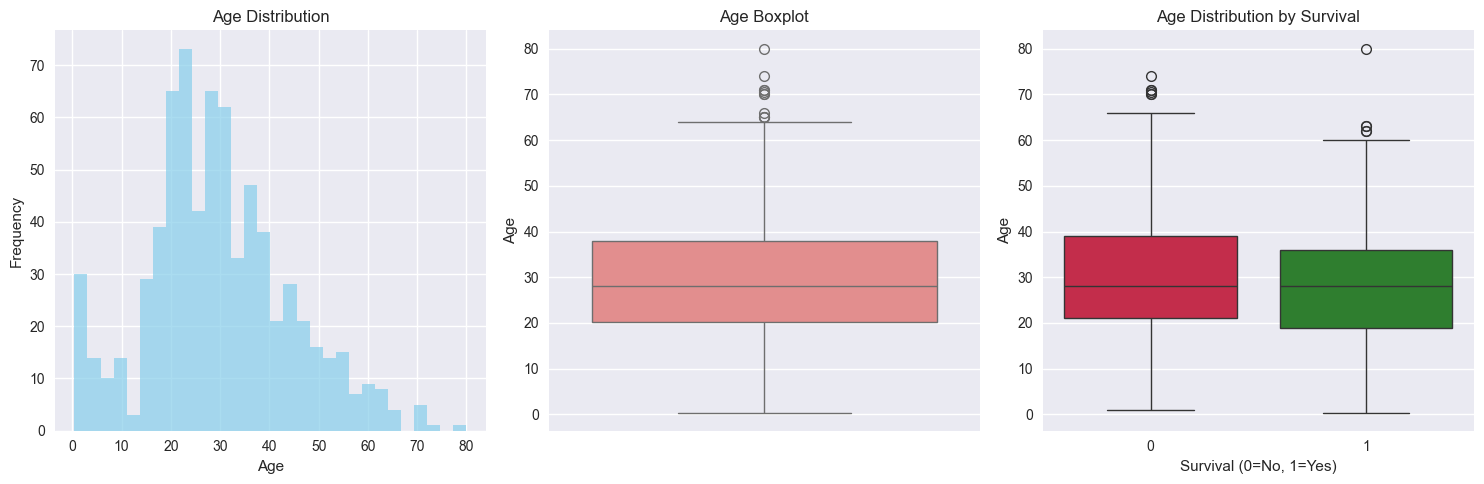

In [14]:
print("\n👶👴 AGE ANALYSIS")
print("=" * 20)

print(f"Average age: {df['Age'].mean():.1f} years")
print(f"Median age: {df['Age'].median():.1f} years")
print(f"Minimum age: {df['Age'].min():.1f} years")
print(f"Maximum age: {df['Age'].max():.1f} years")
print(f"Standard deviation: {df['Age'].std():.1f} years")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df["Age"].hist(bins=30, color="skyblue", alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y="Age", color="lightcoral")
plt.title("Age Boxplot")

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Survived", y="Age", palette=["crimson", "forestgreen"])
plt.title("Age Distribution by Survival")
plt.xlabel("Survival (0=No, 1=Yes)")

plt.tight_layout()
save_current_plot("7_1-Age Distribution", "../results/figures/eda_plots")
plt.show()

### 7.2 Rate Distribution


💰 FARE ANALYSIS
Average fare: $32.20
Median fare: $14.45
Minimum fare: $0.00
Maximum fare: $512.33
✅ Graph saved: ../results/figures/eda_plots\7_2-Fare Distribution.png


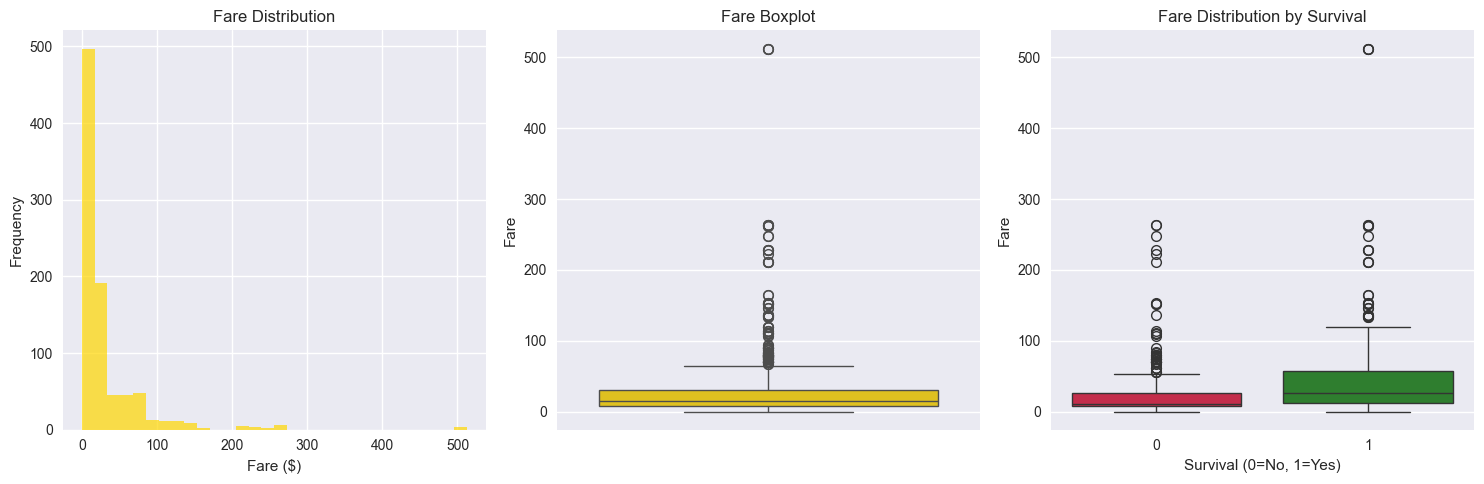

In [15]:
print("\n💰 FARE ANALYSIS")
print("=" * 20)

print(f"Average fare: ${df['Fare'].mean():.2f}")
print(f"Median fare: ${df['Fare'].median():.2f}")
print(f"Minimum fare: ${df['Fare'].min():.2f}")
print(f"Maximum fare: ${df['Fare'].max():.2f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df["Fare"].hist(bins=30, color="gold", alpha=0.7)
plt.title("Fare Distribution")
plt.xlabel("Fare ($)")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y="Fare", color="gold")
plt.title("Fare Boxplot")

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Survived", y="Fare", palette=["crimson", "forestgreen"])
plt.title("Fare Distribution by Survival")
plt.xlabel("Survival (0=No, 1=Yes)")

plt.tight_layout()
save_current_plot("7_2-Fare Distribution", "../results/figures/eda_plots")
plt.show()

## 8. Correlation Analysis


🔗 CORRELATION MATRIX
✅ Graph saved: ../results/figures/eda_plots\8-Correlations.png


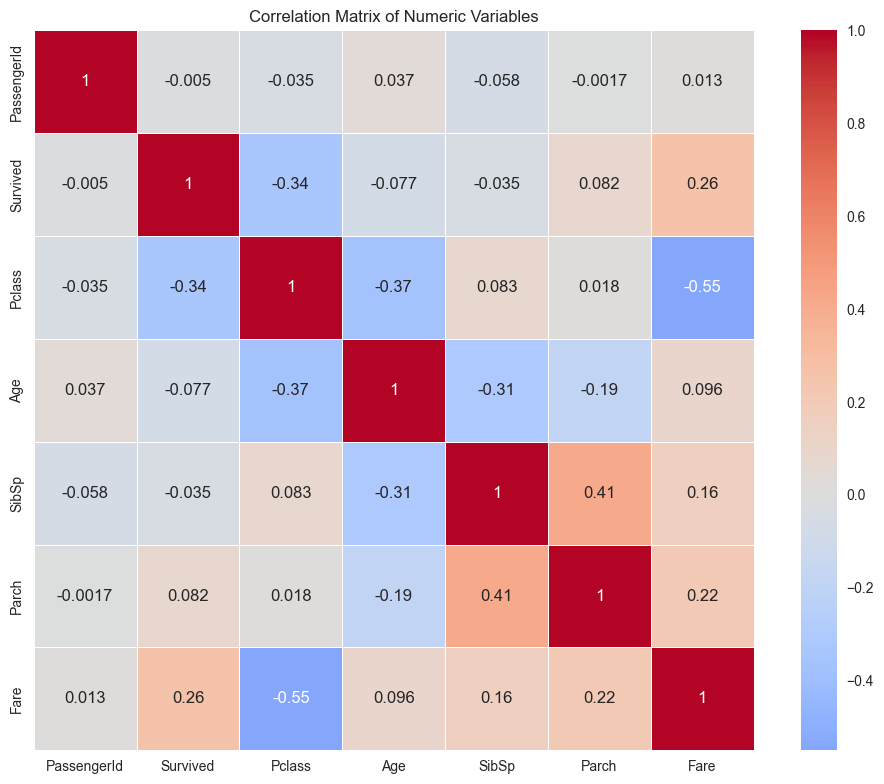

Correlations with Survival:
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [16]:
print("\n🔗 CORRELATION MATRIX")
print("=" * 25)

# Select only numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
)
plt.title("Correlation Matrix of Numeric Variables")
plt.tight_layout()
save_current_plot("8-Correlations", "../results/figures/eda_plots")
plt.show()

# Correlations with target variable
print("Correlations with Survival:")
survival_corr = correlation_matrix["Survived"].sort_values(ascending=False)
print(survival_corr)

## 9. Combined Analysis: Gender, Class and Survival


👥🎫 COMBINED ANALYSIS: GENDER AND CLASS
               Total  Survivors  Survival_Rate
Sex    Pclass                                 
female 1          94         91          0.968
       2          76         70          0.921
       3         144         72          0.500
male   1         122         45          0.369
       2         108         17          0.157
       3         347         47          0.135
✅ Graph saved: ../results/figures/eda_plots\9-Combined Analysis.png


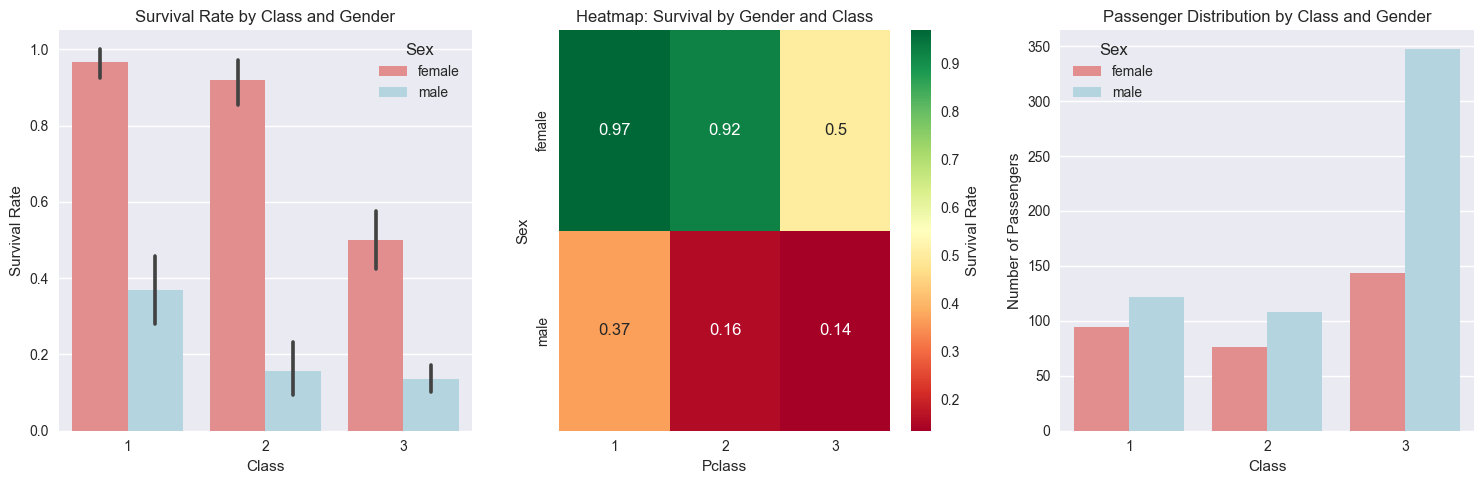

In [17]:
print("\n👥🎫 COMBINED ANALYSIS: GENDER AND CLASS")
print("=" * 40)

# Create cross table
combined_analysis = (
    df.groupby(["Sex", "Pclass"])["Survived"].agg(["count", "sum", "mean"]).round(3)
)
combined_analysis.columns = ["Total", "Survivors", "Survival_Rate"]
print(combined_analysis)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(
    data=df, x="Pclass", y="Survived", hue="Sex", palette=["lightcoral", "lightblue"]
)
plt.title("Survival Rate by Class and Gender")
plt.xlabel("Class")
plt.ylabel("Survival Rate")

plt.subplot(1, 3, 2)
pivot_table = df.pivot_table(
    values="Survived", index="Sex", columns="Pclass", aggfunc="mean"
)
sns.heatmap(pivot_table, annot=True, cmap="RdYlGn", cbar_kws={"label": "Survival Rate"})
plt.title("Heatmap: Survival by Gender and Class")

plt.subplot(1, 3, 3)
sns.countplot(data=df, x="Pclass", hue="Sex", palette=["lightcoral", "lightblue"])
plt.title("Passenger Distribution by Class and Gender")
plt.xlabel("Class")
plt.ylabel("Number of Passengers")

plt.tight_layout()
save_current_plot("9-Combined Analysis", "../results/figures/eda_plots")
plt.show()